## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import numpy as np

### Data Load

In [2]:
df = pd.read_csv('advertisement_success.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 26048 non-null  int64  
 1   realtionship_status                26048 non-null  object 
 2   industry                           26048 non-null  object 
 3   genre                              26048 non-null  object 
 4   targeted_sex                       26048 non-null  object 
 5   average_runtime(minutes_per_week)  26048 non-null  int64  
 6   airtime                            26048 non-null  object 
 7   airlocation                        26048 non-null  object 
 8   ratings                            26048 non-null  float64
 9   expensive                          26048 non-null  object 
 10  money_back_guarantee               26048 non-null  object 
 11  netgain                            26048 non-null  boo

In [4]:
df.describe()

,id,average_runtime(minutes_per_week),ratings
count,26048.000000,26048.000000,26048.000000
mean,16268.744779,40.294111,0.038716
std,9413.578020,12.479457,0.075852
min,2.000000,1.000000,0.000000
25%,8095.750000,40.000000,0.027465
50%,16237.000000,40.000000,0.027465
75%,24413.500000,45.000000,0.027465
max,32561.000000,99.000000,1.000000


In [5]:
df.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


### Data Exploration

In [6]:
for col in df.columns:
    print('Column: {0}. Unique Count: {1}'.format(col, df[col].unique()))

Column: id. Unique Count: [19717 31593  5681 ...  2295 17902 30877]
Column: realtionship_status. Unique Count: ['Married-spouse-absent' 'Married-civ-spouse' 'Divorced' 'Separated'
 'Never-married' 'Widowed' 'Married-AF-spouse']
Column: industry. Unique Count: ['Auto' 'Pharma' 'Entertainment' 'Political' 'ClassAction' 'Other']
Column: genre. Unique Count: ['Comedy' 'Infomercial' 'Drama' 'Direct' 'Other']
Column: targeted_sex. Unique Count: ['Male' 'Female']
Column: average_runtime(minutes_per_week). Unique Count: [45 40 48 50 35 20 25 72 56 60 24  6 12 73 30 32 36  3 70 55 38 80 65 46
 15 42 84 99 16 43 10 58  8 18 44 33 90  5 68 26 22 39 75 77  4 89 49 52
 13 37 54  2 31 66  1 41 17 27 28 47 98 64 11 14 23 21 19  7 57 34 53  9
 67 96 29 78 95 62 91 61 82 85 63 92 81 88 76 59 51 74 87]
Column: airtime. Unique Count: ['Primetime' 'Morning' 'Daytime']
Column: airlocation. Unique Count: ['United-States' 'Outlying-US(Guam-USVI-etc)' 'Mexico' 'Laos'
 'International' 'India' 'Poland' 'South' 

In [7]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==================================================================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

id : [19717 31593  5681 ...  2295 17902 30877]
realtionship_status : ['Married-spouse-absent' 'Married-civ-spouse' 'Divorced' 'Separated'
 'Never-married' 'Widowed' 'Married-AF-spouse']
industry : ['Auto' 'Pharma' 'Entertainment' 'Political' 'ClassAction' 'Other']
genre : ['Comedy' 'Infomercial' 'Drama' 'Direct' 'Other']
targeted_sex : ['Male' 'Female']
average_runtime(minutes_per_week) : [45 40 48 50 35 20 25 72 56 60 24  6 12 73 30 32 36  3 70 55 38 80 65 46
 15 42 84 99 16 43 10 58  8 18 44 33 90  5 68 26 22 39 75 77  4 89 49 52
 13 37 54  2 31 66  1 41 17 27 28 47 98 64 11 14 23 21 19  7 57 34 53  9
 67 96 29 78 95 62 91 61 82 85 63 92 81 88 76 59 51 74 87]
airtime : ['Primetime' 'Morning' 'Daytime']
airlocation : ['United-States' 'Outlying-US(Guam-USVI-etc)' 'Mexico' 'Laos'
 'International' 'India' 'Poland' 'South' 'Italy' 'Philippines'
 'Guatemala' 'Columbia' 'Taiwan' 'England' 'Canada' 'Germany' 'Thailand'
 'Puerto-Rico' 'Nicaragua' 'Cuba' 'Trinadad&Tobago' 'Yugoslavia'
 'El-Sal

In [8]:
df.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


### Data Visualisation

<AxesSubplot:>

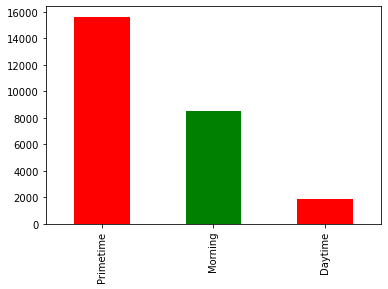

In [9]:
df.airtime.value_counts().plot(kind="bar", color=["red", "green"])

<AxesSubplot:>

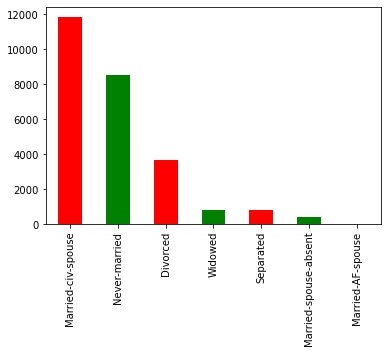

In [10]:
df.realtionship_status.value_counts().plot(kind="bar", color=["red", "green"])

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


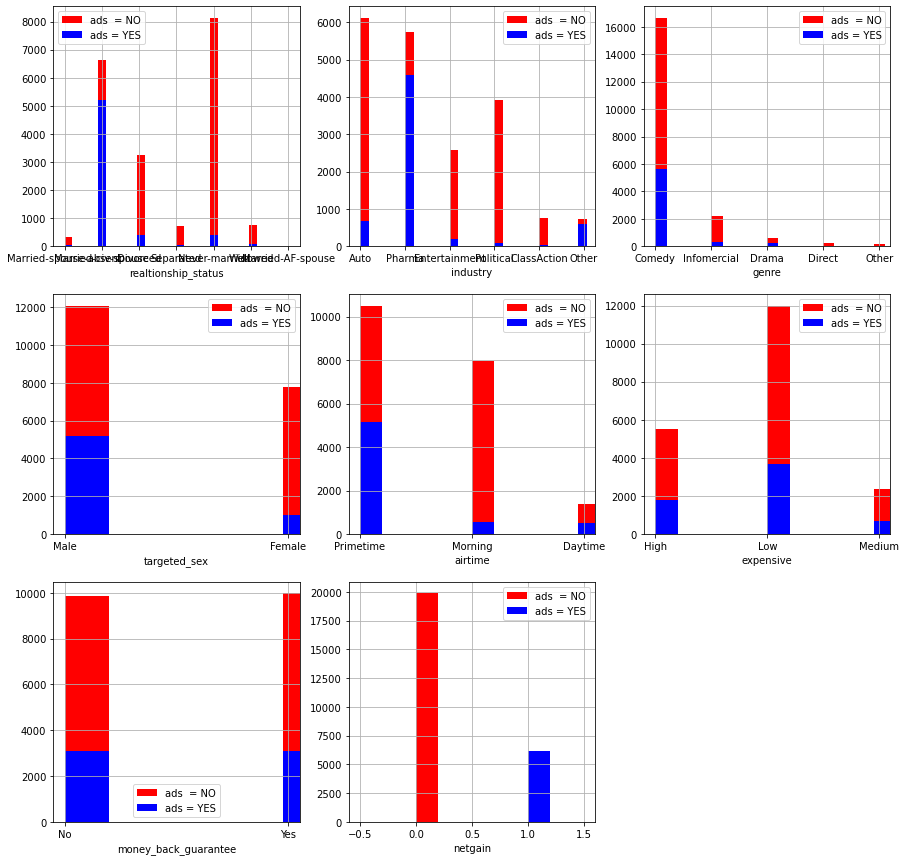

In [11]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["netgain"] == 0][column].hist(bins=40, color='red', label='ads  = NO', alpha=1,width=0.2)
    df[df["netgain"] == 1][column].hist(bins=40, color='blue', label='ads = YES', alpha=1,width=0.2)
    plt.legend()
    plt.xlabel(column)

C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ANKIT\anaconda3\lib\si

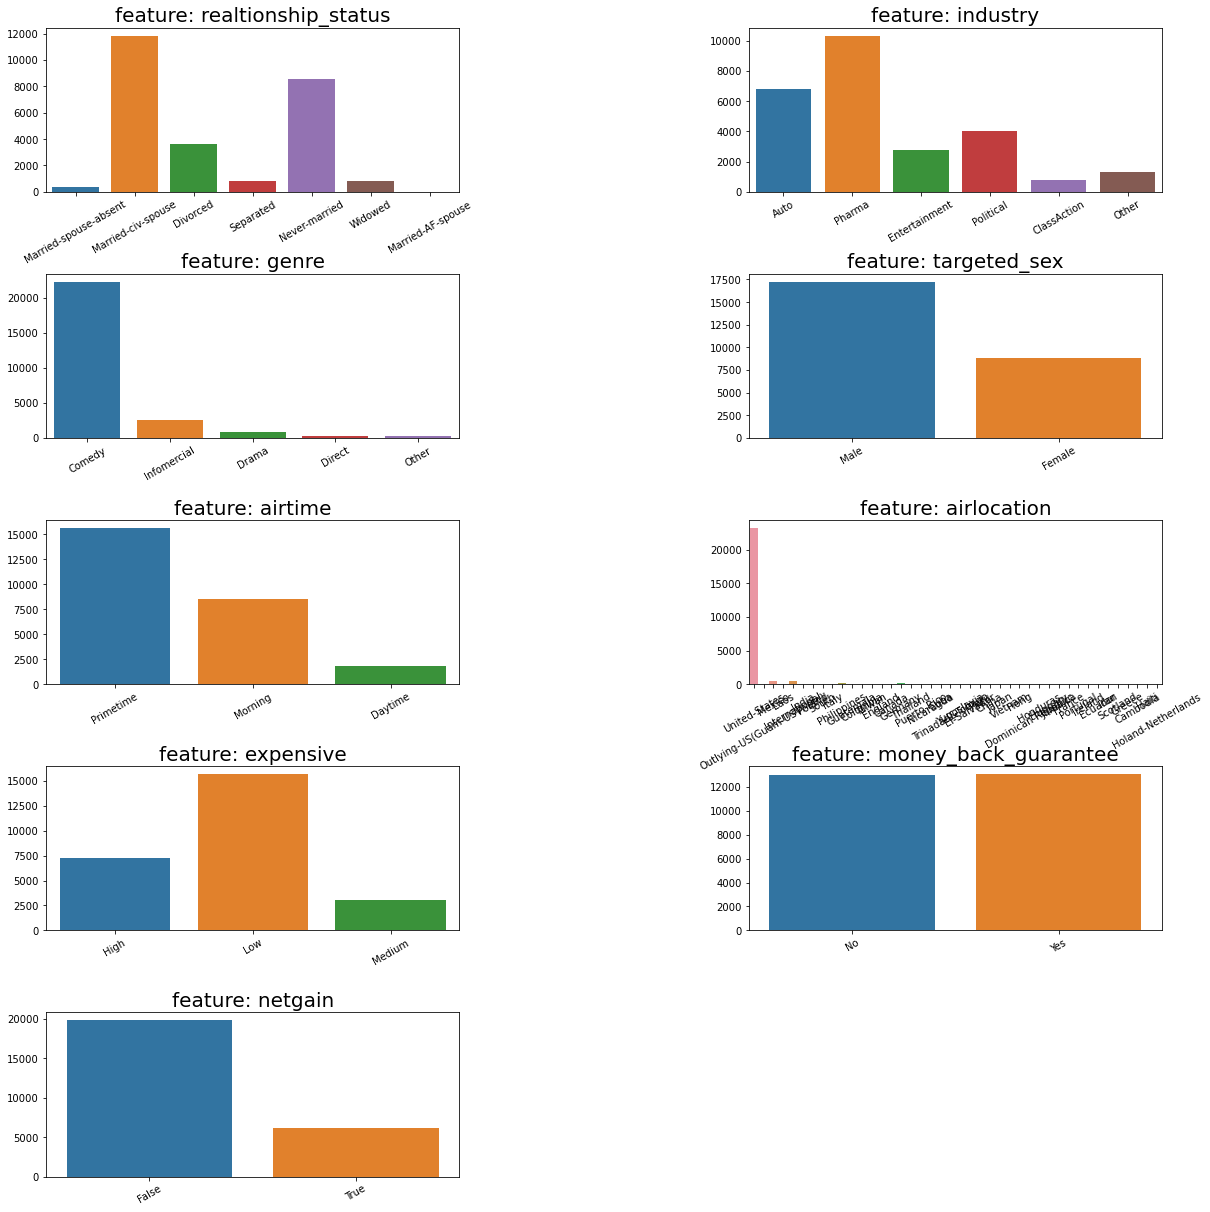

In [12]:
gs = gridspec.GridSpec(nrows=18, ncols=2)
gs.update(wspace=0.7, hspace=0.5)
plt.figure(figsize=(20,80))
for i, col in enumerate(df.loc[:, (df.dtypes == "object") | (df.dtypes == "bool")]):
    ax1 = plt.subplot(gs[i])
    sns.countplot(df[col])
    ax1.set_title('feature: ' + str(col), fontdict={'fontsize':20})
    ax1.set_xlabel('')
    ax1.set_ylabel('')
    plt.xticks(rotation=30)
plt.show()

### Data Cleaning

In [13]:
df.isna().sum()

id                                   0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [14]:
missing_values_count = df.isnull().sum()

total_cells = np.product(df.shape)

total_missing = missing_values_count.sum()

percentage_missing = (total_missing/total_cells)*100
print(percentage_missing)

0.0


### Label encoding from categorical featurtes

In [15]:
from sklearn import preprocessing

In [16]:
le = preprocessing.LabelEncoder()
le.fit(df['netgain'])
list(le.classes_)
df['netgain'] = le.transform(df['netgain']) 
df

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,0
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,0
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,0
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,0
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26043,16009,Married-civ-spouse,Pharma,Comedy,Male,50,Primetime,United-States,0.027465,Low,No,1
26044,17241,Never-married,Auto,Comedy,Female,40,Morning,United-States,0.027465,Low,No,0
26045,2295,Married-civ-spouse,Other,Comedy,Female,25,Primetime,United-States,0.102234,Low,No,1
26046,17902,Never-married,Auto,Comedy,Female,48,Morning,United-States,0.027465,Low,Yes,0


In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
x = df.copy()
y = x.pop('netgain')

In [19]:
for colname in x.select_dtypes('object'):
    x[colname],_ = x[colname].factorize()
    
discrete_features = x.dtypes ==int

### show a few features with their Mutual Info scores

In [20]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(x, y, discrete_features):
    mi_scores = mutual_info_regression(x, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y, discrete_features)
mi_scores[::1]

industry                             0.107846
realtionship_status                  0.104322
ratings                              0.070757
airtime                              0.049602
average_runtime(minutes_per_week)    0.027450
targeted_sex                         0.024760
genre                                0.006542
airlocation                          0.002739
id                                   0.000000
expensive                            0.000000
money_back_guarantee                 0.000000
Name: MI Scores, dtype: float64

In [21]:
x.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,19717,0,0,0,0,45,0,0,0.027465,0,0
1,31593,1,1,0,0,45,0,0,0.027465,1,0
2,5681,2,2,0,1,45,0,0,0.027465,0,1
3,15491,3,3,1,1,40,0,0,0.027465,1,0
4,23587,1,1,0,0,48,0,0,0.027465,0,0


In [22]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: netgain, dtype: int64

### Data Visualization With most Dependent Features

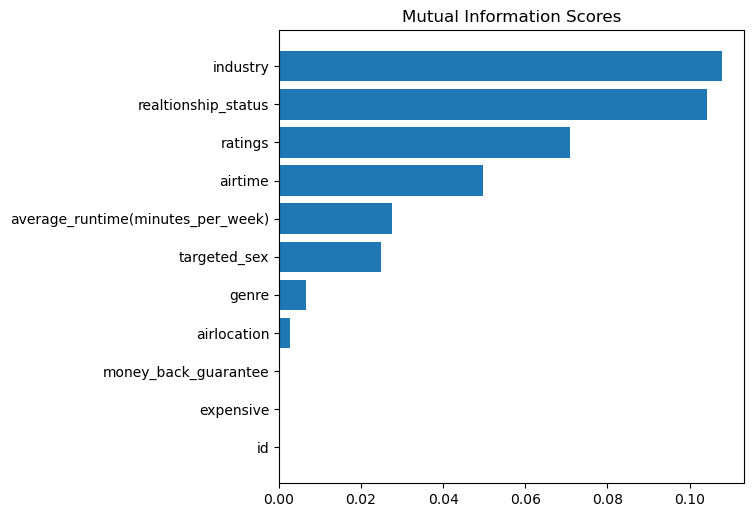

In [23]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(6,6))
plot_mi_scores(mi_scores)

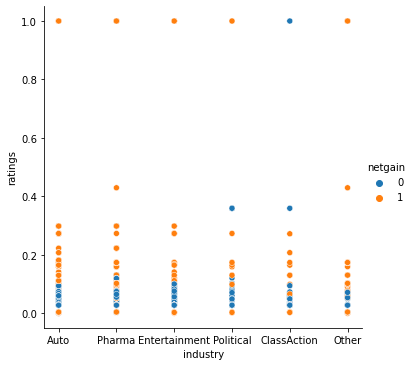

In [24]:
sns.relplot(x='industry', y='ratings',hue='netgain', data=df)

In [25]:
x

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,19717,0,0,0,0,45,0,0,0.027465,0,0
1,31593,1,1,0,0,45,0,0,0.027465,1,0
2,5681,2,2,0,1,45,0,0,0.027465,0,1
3,15491,3,3,1,1,40,0,0,0.027465,1,0
4,23587,1,1,0,0,48,0,0,0.027465,0,0
...,...,...,...,...,...,...,...,...,...,...,...
26043,16009,1,1,0,0,50,0,0,0.027465,1,0
26044,17241,4,0,0,1,40,1,0,0.027465,1,0
26045,2295,1,5,0,1,25,0,0,0.102234,1,0
26046,17902,4,0,0,1,48,1,0,0.027465,1,1


### First, analyse the target variable

z = df["netgain"]

sns.countplot(z)


target_temp = df.netgain.value_counts()

print(target_temp)

In [27]:
print("Percentage of People where advertisement is success: "+str(y.where(y==1).count()*100/26408))
print("Percentage of People where advertisement is not success: "+str(y.where(y==0).count()*100/26408))

Percentage of People where advertisement is success: 23.458800363526205
Percentage of People where advertisement is not success: 75.17797637079673


### Relationship_status feature

['Married-spouse-absent' 'Married-civ-spouse' 'Divorced' 'Separated'
 'Never-married' 'Widowed' 'Married-AF-spouse']


C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='realtionship_status', ylabel='netgain'>

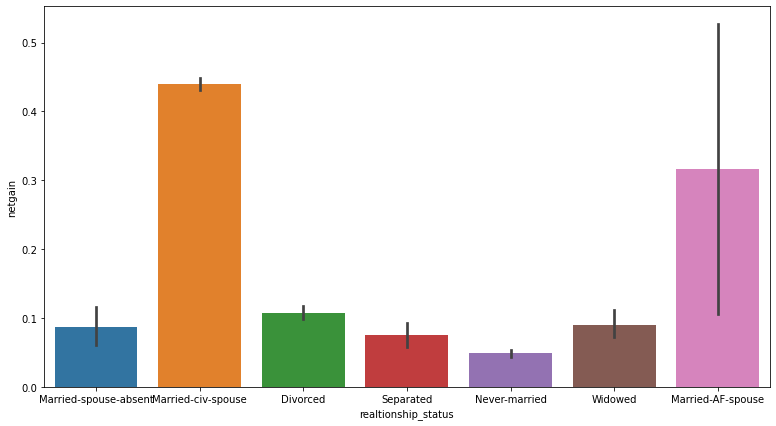

In [28]:
print(df["realtionship_status"].unique())
plt.figure(figsize=(13,7))
sns.barplot(df["realtionship_status"],y)

count      26048
unique         6
top       Pharma
freq       10339
Name: industry, dtype: object
['Auto' 'Pharma' 'Entertainment' 'Political' 'ClassAction' 'Other']


C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='industry', ylabel='netgain'>

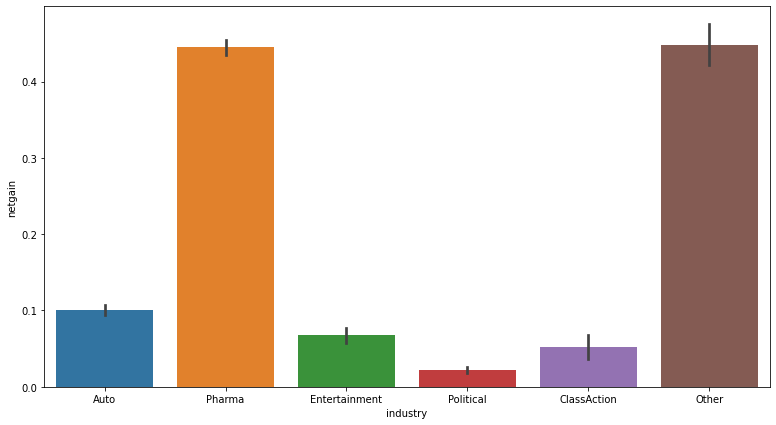

In [29]:
print(df["industry"].describe())
print(df["industry"].unique())
plt.figure(figsize=(13,7))
sns.barplot(df["industry"],y)

count      26048
unique         5
top       Comedy
freq       22258
Name: genre, dtype: object
['Comedy' 'Infomercial' 'Drama' 'Direct' 'Other']


C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genre', ylabel='netgain'>

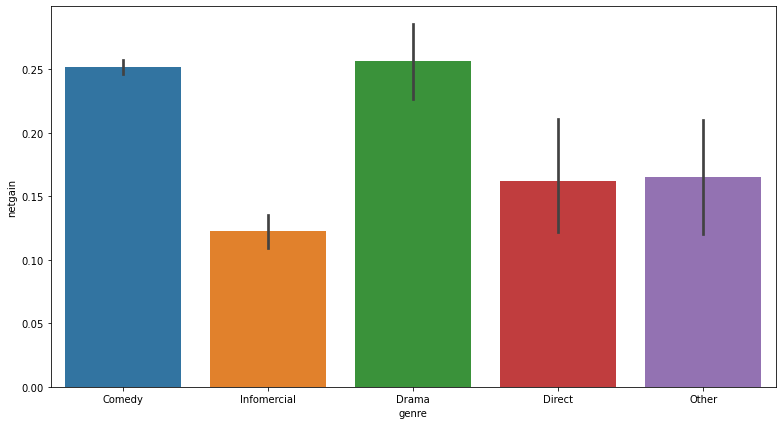

In [30]:
print(df["genre"].describe())
print(df["genre"].unique())
plt.figure(figsize=(13,7))
sns.barplot(df["genre"],y)

count     26048
unique        2
top        Male
freq      17245
Name: targeted_sex, dtype: object
['Male' 'Female']


C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='targeted_sex', ylabel='netgain'>

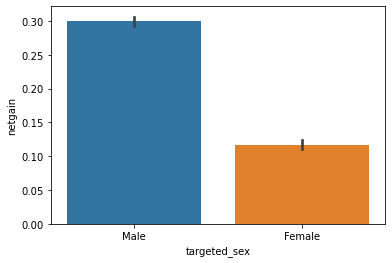

In [31]:
print(df["targeted_sex"].describe())
print(df["targeted_sex"].unique())
sns.barplot(df["targeted_sex"],y)

count    26048.000000
mean        40.294111
std         12.479457
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: average_runtime(minutes_per_week), dtype: float64
[45 40 48 50 35 20 25 72 56 60 24  6 12 73 30 32 36  3 70 55 38 80 65 46
 15 42 84 99 16 43 10 58  8 18 44 33 90  5 68 26 22 39 75 77  4 89 49 52
 13 37 54  2 31 66  1 41 17 27 28 47 98 64 11 14 23 21 19  7 57 34 53  9
 67 96 29 78 95 62 91 61 82 85 63 92 81 88 76 59 51 74 87]


C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='average_runtime(minutes_per_week)', ylabel='netgain'>

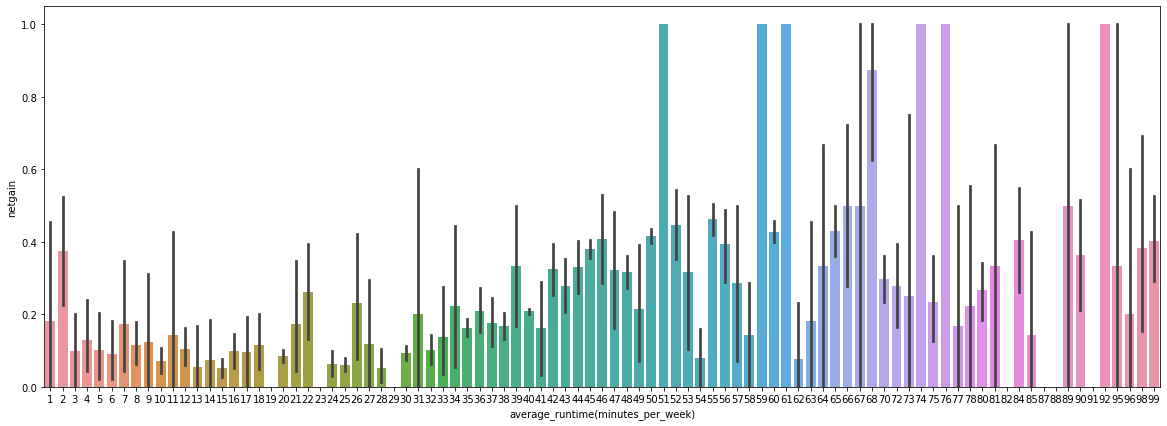

In [32]:
print(df["average_runtime(minutes_per_week)"].describe())
print(df["average_runtime(minutes_per_week)"].unique())
plt.figure(figsize=(20,7))
sns.barplot(df["average_runtime(minutes_per_week)"],y)

C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ratings', ylabel='Density'>

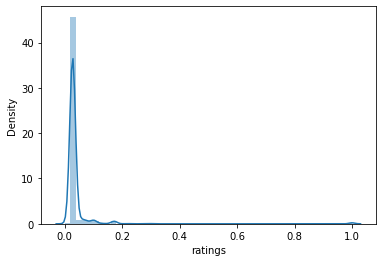

In [33]:
sns.distplot(df["ratings"])

<AxesSubplot:xlabel='genre', ylabel='Count'>

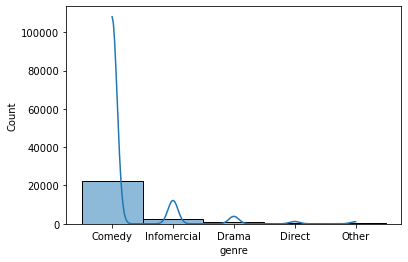

In [34]:
sns.histplot(data=df, x="genre", kde = True)

<AxesSubplot:xlabel='industry', ylabel='Count'>

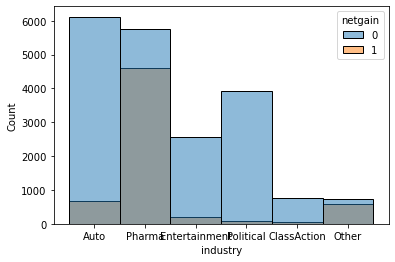

In [52]:
sns.histplot(data=df, x="industry", hue="netgain")

<AxesSubplot:xlabel='realtionship_status', ylabel='Count'>

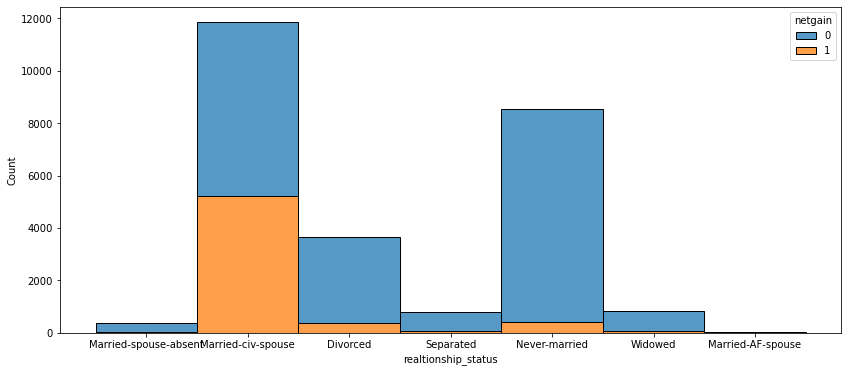

In [53]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x="realtionship_status", hue="netgain",multiple="stack")

<AxesSubplot:xlabel='ratings', ylabel='netgain'>

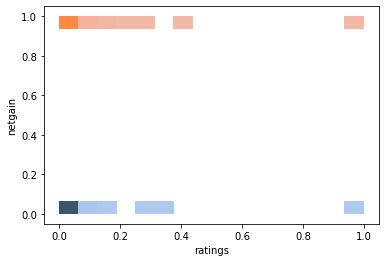

In [54]:
sns.histplot(
    df, x="ratings", y="netgain", hue="netgain", legend=False
)

### Train Test split

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [56]:
X_train.shape

(20838, 11)

In [57]:
X_test.shape

(5210, 11)

### Model Fitting

In [58]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\Users\ANKIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
Y_pred_lr.shape

(5210,)

In [61]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 75.78 %


### Naive Bayes

In [62]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [63]:
Y_pred_nb.shape

(5210,)

In [64]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 74.38 %


### K Nearest Neighbors

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [66]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 73.65 %


### XGBoost

In [67]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:33:31] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\ANKIT\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [68]:
Y_pred_xgb.shape

(5210,)

In [69]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 80.86 %


### Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [71]:
print(Y_pred_dt.shape)

(5210,)


In [72]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 77.64 %


## Final Accuracy of all Models that which Model is best fitted

In [75]:
scores = [score_lr,score_nb,score_knn,score_dt,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","K-Nearest Neighbors","Decision Tree","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 75.78 %
The accuracy score achieved using Naive Bayes is: 74.38 %
The accuracy score achieved using K-Nearest Neighbors is: 73.65 %
The accuracy score achieved using Decision Tree is: 77.64 %
The accuracy score achieved using XGBoost is: 80.86 %


C:\Users\ANKIT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

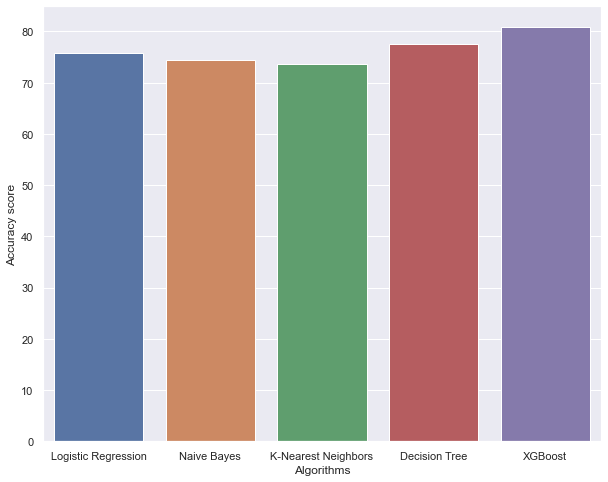

In [77]:
sns.set(rc={'figure.figsize':(10,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)